In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import numpy as np
import seaborn as sns
%matplotlib inline
import time



ModuleNotFoundError: No module named 'pandas'

In [2]:
import sys
print (sys.executable)
%config IPCompleter.greedy=True

/usr/bin/python3


In [4]:
import pyodbc

server = 'bpw-docsql.ts.telekom.si'
database = 'DM_Mobitel_docbase'
username= 'barcode'
password = ''
conn = pyodbc.connect(
    'DRIVER={ODBC Driver 17 for SQL Server};'
    'SERVER='+server+';'
    'DATABASE='+database+';'
    'Encryption=Yes;'
    'UID='+ username + ';'
    'PWD='+ password + ';'
)

Error: ('01000', "[01000] [unixODBC][Driver Manager]Can't open lib '/opt/microsoft/msodbcsql17/lib64/libmsodbcsql-17.8.so.1.1' : file not found (0) (SQLDriverConnect)")

In [51]:
singleTableSqlTemplate =(
'SELECT     \'table$\' as tableName,  \n' 
'           FORMAT(dm_sysobject_s.r_creation_date, \'yyyy-MM\') as timeperiod, \n'
'           dm_sysobject_s.owner_name as owner_name,  \n'
'           mob_document_s.mob_source as mob_source,  \n'
'           mob_document_s.mob_classification_id as mob_classification_id, \n'
'           Count(*)  \n'
'FROM       table$ a  \n'
'WITH (READUNCOMMITTED) \n'
'INNER JOIN mob_document_s  \n'
'ON         a.r_object_id=mob_document_s.r_object_id  \n'
'INNER JOIN dm_sysobject_s  \n'
'ON         mob_document_s.r_object_id = dm_sysobject_s.r_object_id  \n'
'WHERE      dm_sysobject_s.i_is_deleted = 0 and \n'
'           dm_sysobject_s.r_creation_date >= CONVERT(datetime, \'2020-09-01\') and \n' 
'           dm_sysobject_s.r_creation_date < CONVERT(datetime, \'2020-09-02\')  \n' 
'GROUP BY   FORMAT(dm_sysobject_s.r_creation_date, \'yyyy-MM\'), \n'
'           dm_sysobject_s.owner_name, \n'
'           mob_document_s.mob_source, \n'
'           mob_document_s.mob_classification_id'

)

In [52]:
tables = [
'mob_asset_master_s', 
'mob_az_s', 
'mob_cadre_document_s', 
'mob_cadre_s', 
'mob_container_incoming_mail_s', 
'mob_container_outgoing_mail_s', 
'mob_contract_cadre_s', 
'mob_contract_customer_s', 
'mob_contract_location_s', 
'mob_contract_s', 
'mob_contract_supplier_s', 
'mob_court_case_s', 
'mob_digital_certificate_s', 
'mob_folder_incoming_mail_s', 
'mob_folder_incoming_s', 
'mob_folder_s', 
'mob_form_template_s', 
'mob_helpdesk_s', 
'mob_hwsw_arecord_s', 
'mob_hwsw_bond_s', 
'mob_image_s', 
'mob_incoming_invoice_s', 
'mob_incoming_mail_s', 
'mob_incoming_s', 
'mob_insurance_claim_s', 
'mob_internal_outgoing_s', 
'mob_internalprocess_s', 
'mob_investigator_report_s', 
'mob_ip_helpdesk_s', 
'mob_job_s', 
'mob_log_archive_s', 
'mob_lrp_coaching_s', 
'mob_lrp_s', 
'mob_network_maintenance_s', 
'mob_outgoing_invoice_s', 
'mob_outgoing_mail_s', 
'mob_pksp_revizija_2007_s', 
'mob_pn_s', 
'mob_purchase_document_s', 
'mob_purchase_order_s', 
'mob_security_document_s', 
'mob_simandphone_s', 
'mob_subscriber_document_s', 
'mob_tax_numbers_s', 
'mob_wf_document_s'     
]

In [53]:
wholeSql=''
for table in tables:
    tableSql = singleTableSqlTemplate.replace('table$', table)
    wholeSql = wholeSql + tableSql + '\nUNION \n'

wholeSql = wholeSql[0:len(wholeSql)-7]
wholeSql = wholeSql + 'OPTION (MAXDOP 1)'

In [55]:
time1 = time.time() * 1000
sql_query = pd.read_sql_query(wholeSql,conn)
time2 = time.time() * 1000

In [60]:
print('Sql took: ' + str(int(time2-time1)) + " seconds")
print(sql_query.head())

Sql took: 209838 seconds
                       tableName timeperiod      owner_name  mob_source  \
0                       mob_az_s    2020-09  dm_doclink_sap               
1           mob_cadre_document_s    2020-09  dm_doclink_sap               
2  mob_container_incoming_mail_s    2020-09      delovodnik  Delovodnik   
3           mob_contract_cadre_s    2020-09  dm_doclink_sap               
4                 mob_contract_s    2020-09  dm_doclink_sap               

  mob_classification_id       
0                          1  
1                        184  
2                   053   88  
3                          3  
4                          3  


In [61]:
sql_query.to_pickle('cached_dataframe.pkl')


In [64]:
if sql_query is None:
    sql_query.read_pickle('cached_dataframe.pkl')

In [75]:
df = sql_query

In [80]:
for key in df.groupby(['tableName']).groups.keys():
   print(key)

mob_az_s
mob_cadre_document_s
mob_container_incoming_mail_s
mob_contract_cadre_s
mob_contract_s
mob_court_case_s
mob_incoming_invoice_s
mob_incoming_mail_s
mob_incoming_s
mob_insurance_claim_s
mob_internal_outgoing_s
mob_outgoing_invoice_s
mob_outgoing_mail_s
mob_purchase_document_s
mob_subscriber_document_s
mob_wf_document_s


In [65]:


X = df['TimePeriod']
Y = df['owner_name']
Z = df.iloc[ : , 5 ]

print(X.shape)
print(Y.shape)
print(Z.shape)

KeyError: 'TimePeriod'

KeyError: 'grp'

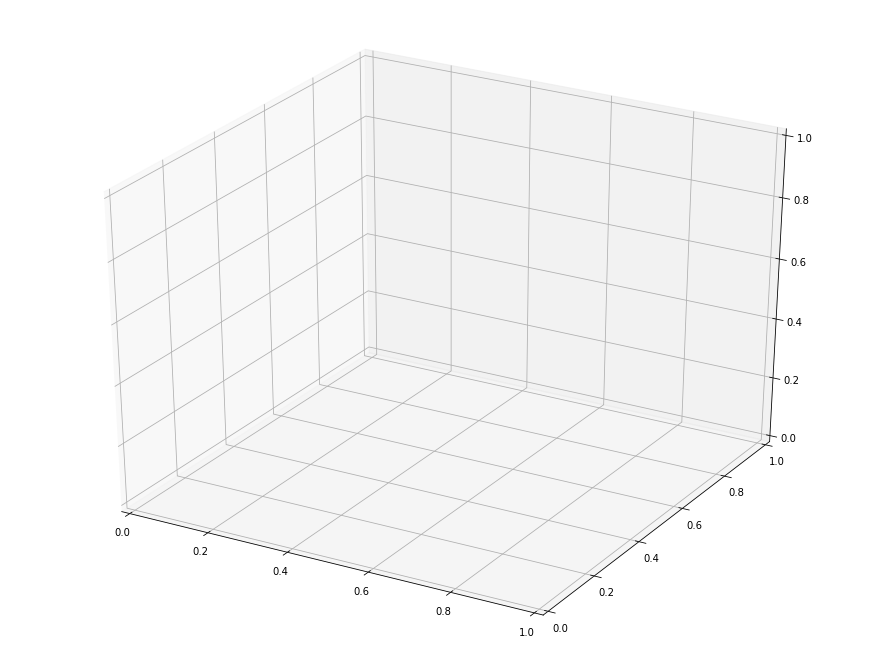

In [35]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 9))
ax = Axes3D(fig)

for grp_name, grp_idx in df.groupby('grp').groups.items():
    y = df.iloc[grp_idx,1]
    x = df.iloc[grp_idx,0]
    z = df.iloc[grp_idx,2]
    ax.scatter(x,y,z, label=grp_name)  # this way you can control color/marker/size of each group freely
    ax.scatter(*df.iloc[grp_idx, [0, 1, 2]].T.values, label=grp_name)  # if you want to do everything in one line, lol

ax.legend()

In [92]:
xs = sql_query[['TimePeriod']]
ys = sql_query[['owner_name']]
zs = sql_query[sql_query.columns[::2]]

In [93]:
ax.set_xlabel('Period')
ax.set_ylabel('owner')
ax.set_zlabel('count')

for m, zlow, zhigh in [('o', -50, -25), ('^', -30, -5)]:
    xs = randrange(n, 23, 32)
    ys = randrange(n, 0, 100)
    zs = randrange(n, zlow, zhigh)
    ax.scatter(xs, ys, zs, marker=m)



NameError: name 'm' is not defined